In [ ]:
import kagglehub

path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 258k/258k [00:00<00:00, 7.35MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np

!gdown "https://drive.google.com/uc?id=1glBGu5zDb0PXB4xKU9T5QWOmm-GqU2ez" -O global_air_quality_data_10000.csv
globalAqi=pd.read_csv("global_air_quality_data_10000.csv")
dfAqi=(globalAqi)
dfAqicopy=(dfAqi.copy())

Downloading...
From: https://drive.google.com/uc?id=1glBGu5zDb0PXB4xKU9T5QWOmm-GqU2ez
To: /content/global_air_quality_data_10000.csv
100% 788k/788k [00:00<00:00, 67.2MB/s]


In [ ]:
import kagglehub

path = kagglehub.dataset_download("sazidthe1/global-air-pollution-data")

print("Path to dataset files:", path)

100%|██████████| 371k/371k [00:00<00:00, 35.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sazidthe1/global-air-pollution-data/versions/3


In [ ]:
import pandas as pd
import numpy as np

!gdown "https://drive.google.com/uc?id=13378lFfWVDhhP5XcLEnfpPvCdIuqksPo" -O global_air_pollution_data.csv
globalPollution=pd.read_csv("global_air_pollution_data.csv")
dfPln=(globalPollution)
dfPollutioncopy=(dfPln.copy())

Downloading...
From: https://drive.google.com/uc?id=13378lFfWVDhhP5XcLEnfpPvCdIuqksPo
To: /content/global_air_pollution_data.csv
100% 1.63M/1.63M [00:00<00:00, 119MB/s]


In [ ]:
dfAqi.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


In [ ]:
dfAqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [ ]:
dfPln.describe()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
data = dfAqi.copy()

In [ ]:
#How do seasons affect country pollution?

In [ ]:
# data["Date"].dtype
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# data['Date'].isnull().sum()
data['Month'] = data['Date'].dt.month

southern_countries = [
    'Australia', 'New Zealand', 'South Africa', 'Argentina', 'Chile',
    'Uruguay', 'Paraguay', 'Lesotho', 'Namibia', 'Botswana',
    'Madagascar', 'Papua New Guinea', 'Vanuatu', 'Solomon Islands'
]
equatorial_countries = [
    'Brazil', 'Indonesia', 'Ecuador', 'Kenya', 'Colombia', 'Democratic Republic of the Congo',
    'Uganda', 'Gabon', 'Congo', 'Somalia', 'Venezuela (Bolivarian Republic of)',
    'Papua New Guinea', 'Tanzania', 'Nigeria'
]

def get_hemisphere(country):
    if country in southern_countries:
        return "Southern"
    elif country in equatorial_countries:
        return "Equatorial"
    else:
        return "Northern"
data['Hemisphere'] = data['Country'].apply(get_hemisphere)

print(data)

                City       Country       Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand 2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey 2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil 2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India 2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France 2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...        ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa 2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany 2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia 2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany 2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand 2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Spe

In [ ]:
def get_season(month, hemisphere):
    if hemisphere == 'south':
        seasons = {
            12: 'Summer', 1: 'Summer', 2: 'Summer',
            3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
            6: 'Winter', 7: 'Winter', 8: 'Winter',
            9: 'Spring', 10: 'Spring', 11: 'Spring'
        }
    else:
        seasons = {
            12: 'Winter', 1: 'Winter', 2: 'Winter',
            3: 'Spring', 4: 'Spring', 5: 'Spring',
            6: 'Summer', 7: 'Summer', 8: 'Summer',
            9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
        }
    return seasons.get(month)

data['Season'] = data.apply(lambda x: get_season(x['Month'], x['Hemisphere']), axis=1)
print(data)

                City       Country       Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand 2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey 2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil 2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India 2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France 2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...        ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa 2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany 2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia 2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany 2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand 2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Spe

In [ ]:
seasonal_avg = data.groupby(['Hemisphere', 'Season'])[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean()
print(seasonal_avg)

                       PM2.5        PM10        NO2        SO2        CO  \
Hemisphere Season                                                          
Equatorial Autumn  74.441890  105.093307  51.554173  23.923937  4.869606   
           Spring  73.198065  105.019032  51.472661  23.728468  5.013629   
           Summer  75.789044  101.009412  52.386544  24.962059  4.818897   
           Winter  79.959135  112.163269  53.158558  25.888942  4.939423   
Northern   Autumn  76.560602  105.312413  51.774807  25.810409  5.091224   
           Spring  77.141610  104.551740  52.282726  25.729806  5.063323   
           Summer  78.088445  104.068840  51.929093  25.227877  5.067741   
           Winter  78.001788  103.683315  52.521798  24.880403  4.997720   
Southern   Autumn  80.690885  108.699808  52.753385  25.464115  5.081115   
           Spring  80.058120  103.418647  54.225038  25.492632  5.314737   
           Summer  73.139528   99.416339  52.949449  25.366220  4.861457   
           W

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

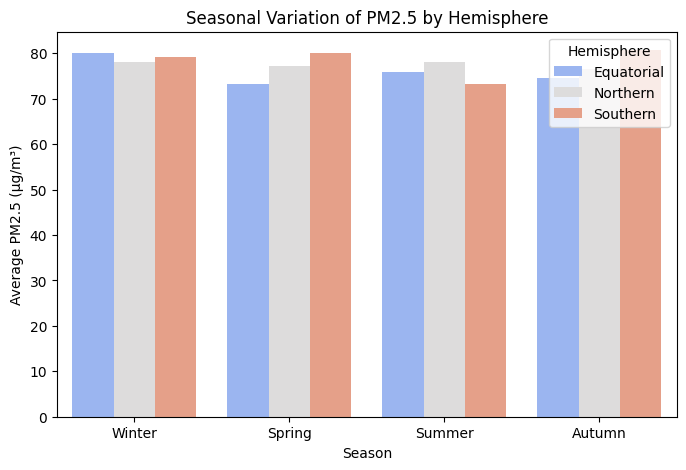

In [ ]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

plt.figure(figsize=(8,5))
sns.barplot(data=seasonal_avg, x='Season', y='PM2.5', hue='Hemisphere', order=season_order, palette='coolwarm')
plt.title('Seasonal Variation of PM2.5 by Hemisphere')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xlabel('Season')
plt.legend(title='Hemisphere')
plt.show()

In [ ]:
#Does pollution disperse differently in cities located in valleys vs. coastal regions?

In [ ]:
unique_cities = data["City"].unique()
l = unique_cities.tolist()
print(l)

['Bangkok', 'Istanbul', 'Rio de Janeiro', 'Mumbai', 'Paris', 'Los Angeles', 'Tokyo', 'New York', 'London', 'Seoul', 'Cairo', 'Mexico City', 'Berlin', 'Beijing', 'Sydney', 'Dubai', 'Toronto', 'Madrid', 'Johannesburg', 'Moscow']


In [ ]:
valley_cities = ["Mexico City", "Johannesburg", "Berlin", "Madrid", "Beijing", "Moscow"]
coastal_cities = ["Rio de Janeiro", "Los Angeles", "Tokyo", "Sydney", "Mumbai", "Dubai", "Istanbul", "New York", "London"]

In [ ]:
def classify(city):
    if city in valley_cities:
        return "Valley"
    elif city in coastal_cities:
        return "Coastal"
    else:
        return "Other"

data["Region_type"] = data["City"].apply(classify)

In [ ]:
group_stats = data.groupby("Region_type")["PM2.5"].mean()
print(group_stats)

Region_type
Coastal    78.019257
Other      76.341084
Valley     77.534811
Name: PM2.5, dtype: float64


In [ ]:
dispersion_stats = data.groupby("Region_type")["PM2.5"].std()
print(dispersion_stats)

Region_type
Coastal    42.104166
Other      42.033373
Valley     41.568298
Name: PM2.5, dtype: float64


In [ ]:
import kagglehub

path = kagglehub.dataset_download("abmsayem/air-pollution")

print("Path to dataset files:", path)

100%|██████████| 751k/751k [00:00<00:00, 79.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abmsayem/air-pollution/versions/1


In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, "absolute-number-of-deaths-from-ambient-particulate-air-pollution.csv")

df = pd.read_csv(file_path)
df.head()


,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk

In [ ]:
# Which countries have the highest outdoor air pollution deaths over time?

In [ ]:
unique_countries = df["Entity"].unique()
l = unique_countries.tolist()
print(l)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icel

In [ ]:
outdoor_col = "Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)"

top_total = (df.groupby("Entity")[outdoor_col].sum().sort_values(ascending=False).head(10))
print("Top 10 countries with highest total outdoor air pollution deaths:")
top_total



Top 10 countries with highest total outdoor air pollution deaths:


,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
Entity,
World,98091458
China,32828190
India,18615995
Russia,3668855
United States,2605620
Egypt,2207554
Pakistan,2157936
Indonesia,2154732
Ukraine,1750288


In [ ]:
#How have global outdoor air pollution deaths changed over time?

In [ ]:
global_trend = (df.groupby("Year")[outdoor_col].sum().reset_index())
global_trend

,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
0,1990,4508300
1,1991,4595153
2,1992,4711621
3,1993,4872812
4,1994,5000670
5,1995,5088140
6,1996,5174995
7,1997,5314820
8,1998,5435517
9,1999,5618159


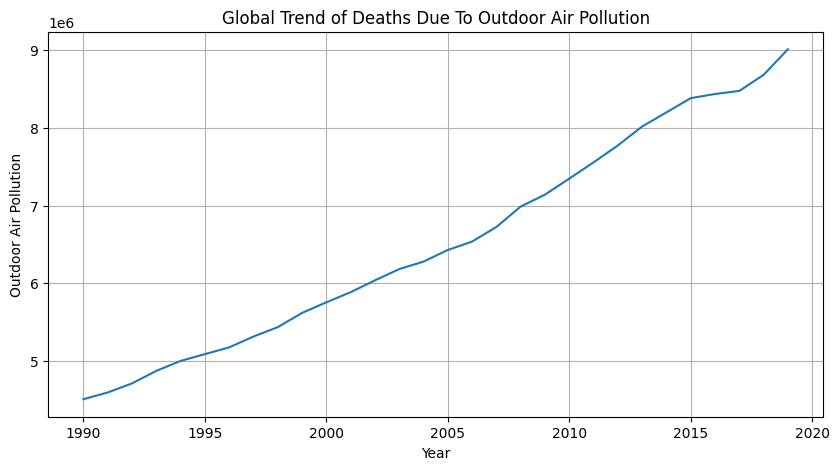

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(global_trend["Year"], global_trend[outdoor_col])
plt.xlabel("Year")
plt.ylabel("Outdoor Air Pollution")
plt.title("Global Trend of Deaths Due To Outdoor Air Pollution")
plt.grid(True)
plt.show()

In [ ]:
#Which countries have the fastest increase or decrease in outdoor pollution deaths?

In [ ]:
first_vals = (
    df.sort_values(["Entity", "Year"])
      .groupby("Entity")
      .first()
      .reset_index()[["Entity", outdoor_col]]
      .rename(columns={outdoor_col: "first_value"})
)

last_vals = (
    df.sort_values(["Entity", "Year"])
      .groupby("Entity")
      .last()
      .reset_index()[["Entity", outdoor_col]]
      .rename(columns={outdoor_col: "last_value"})
)

change = first_vals.merge(last_vals, on="Entity", how="inner")

change["pct_change"] = ((change["last_value"] - change["first_value"]) /
                         change["first_value"]) * 100

change = change.replace([float("inf"), -float("inf")], pd.NA).dropna()

fastest_increase = change.sort_values("pct_change", ascending=False).head(10)
fastest_decrease = change.sort_values("pct_change").head(10)

print("FASTEST INCREASE:")
print(fastest_increase)

print("\nFASTEST DECREASE:")
print(fastest_decrease)


FASTEST INCREASE:
                   Entity  first_value  last_value  pct_change
50               Djibouti           72         460  538.888889
56      Equatorial Guinea           64         403  529.687500
192  United Arab Emirates          604        3401  463.079470
52     Dominican Republic          715        3832  435.944056
202                 Yemen         2222       11598  421.962196
33             Cape Verde           64         321  401.562500
78               Honduras          402        1882  368.159204
165       Solomon Islands           25         109  336.000000
127             Nicaragua          242        1034  327.272727
198               Vanuatu           13          55  323.076923

FASTEST DECREASE:
             Entity  first_value  last_value  pct_change
58          Estonia          713         167  -76.577840
134          Norway         1705         454  -73.372434
174          Sweden         2759         757  -72.562523
62          Finland         1365         4